# Lasso回帰

正則化項にパラメータの絶対値の和を用いた線形回帰モデル。L1正則化とも呼ばれる。Lassoの読み方はラッソ。

$$
\begin{align}
R(\bm\theta) &= \sum_{i=1}^m |\theta_i| = \|\bm\theta\|_1 \\
J(\bm w)
    &= \| \bm y - \bm X \bm w \|_2^2 + \alpha R(\bm w) \\
    &= \| \bm y - \bm X \bm w \|_2^2 + \alpha \| \bm w \|_1
\end{align}
$$

これを解く。

さて、これまで通り微分して0になる点を求めよう、といきたいところだが、絶対値が含まれているので普通には解けない。絶対値が微分できないので。

解析的に解くことができないので、数値的に解く。Lassoの最適化アルゴリズムは色々あるが、ここでは座標降下法を使って解いていく。そのために、まずは劣微分という概念を学ぶ。

In [1]:
import numpy as np
import matplotlib.pyplot as plt


---

## 劣微分

*Subgradient* 

微分の定義を少し拡張したようなもの。微分の一般化とも見られる。関数$f(x)$の$x=a$における劣微分を次のように定義する。

「任意の$x$に対して$f(x)\geq f(a)+c(x-a)$が成り立つような$c$の集合」


よくわからない人は具体例を見ると良い。例えば、$f(x)=|x|$の$x=0$における劣微分は$[-1,1]$である。

In [2]:
from matplotlib.animation import FuncAnimation
from IPython.display import display, HTML

x = np.linspace(-1, 1, 100)
y = np.abs(x)

fig, ax = plt.subplots(figsize=(4, 4))
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.plot(x, y, label="f(x)=|x|")
line, = ax.plot([], [], color="red", label="subgradient", alpha=0.7)
ax.legend(loc="lower center")

def update(frame):
    line.set_data(x, x * frame)
    ax.set_title(f"c = {frame:.2f}")

ani = FuncAnimation(
    fig,
    update,
    frames=np.linspace(-1, 1, 25),
    interval=50,
    repeat=False,
)
plt.close()
display(HTML(ani.to_jshtml()))

「$x=0$を通り且つ$f(x)$を超えない直線（劣勾配という。動画の赤い直線）の傾き$c$」が全て$x=0$における劣微分となる。今回の場合は$-1\sim1$の範囲。

以上を踏まえ、$f(x)=|x|$の微分を以下に定義する。

$$
f'(x) = \begin{cases}
-1 & (x<0) \\
[-1,1] & (x=0) \\
1 & (x>0) \\
\end{cases}
$$

こうすることで、$x=0$における微分が考えられるようになる。

### 絶対値を含む関数の最適化

劣微分を使って、絶対値を含む下に凸な関数を最適化（最小化）する。

通常の下に凸な二次関数は、微分をして0になる点が最小値となる。しかし、絶対値を含む関数は素直に微分ができないので、劣微分を用いる。具体的には、「劣微分に0が含まれる点」を求める。これが最適解になる。

例えば、$f(x)=|x|$の場合、$x=0$とすると$0\in f'(x)=[-1,1]$になるので$x=0$が最適解となる。

次にこんな関数を考える。

$$
f(x) = ax^2 + bx + c + d|x| \\
$$

- $a, d > 0$

二次関数に絶対値を足した。この関数を最小化する$x$を求める。

求め方は先ほどと同じで、劣微分に0が含まれる点を求める。微分してみよう。

$$
f'(x) = 2ax + b + d(|x|)'
$$

ここで、


$$
(|x|)' = \begin{cases}
-1 & (x<0) \\
[-1,1] & (x=0) \\
1 & (x>0) \\
\end{cases}
$$

より、

$$
f'(x) = \begin{cases}
2ax + b - d & (x<0) \\
[2ax + b - d, 2ax + b + d] & (x=0) \\
2ax + b + d & (x>0) \\
\end{cases}
$$

あとはこれが0になる（0を含む）$x$を求める。

まず$x<0$の範囲を考える。$f'(x)=0$を解く。

$$
\begin{align}
f'(x) &= 0 \\
2ax + b - d &= 0 \\
x &= -\frac{b-d}{2a}
\end{align}
$$

そしてこの$x$が$<0$となるのは$b>d$の時なので、$b>d$の時、$x=-\frac{b-d}{2a}$が$f(x)$の最適解となる。

次に$x>0$の範囲を考える。

$$
\begin{align}
f'(x) &= 0 \\
2ax + b + d &= 0 \\
x &= -\frac{b+d}{2a}
\end{align}
$$

そしてこの$x$が$>0$となるのは$b<-d$の時なので、$b<-d$の時、$x=-\frac{b+d}{2a}$が$f(x)$の最適解となる。

最後に、どちらにも当てはまらない時、つまり$-d\leq b\leq d$の時を考えるが、$x<0$でも$x>0$でもないことが確定しているので、$x=0$が$f(x)$の最適解となる。

まとめるとこうなる。

$$
\argmin_x f(x) = \begin{cases}
-\frac{b+d}{2a} & (b<-d) \\
0 & (-d\leq b\leq d) \\
-\frac{b-d}{2a} & (b>d) \\
\end{cases}
$$

実際に例を見てみよう。

例えば$a, b, c, d = 1, 2, 3, 4$とすると、$-d\leq b\leq d$になるので$x=0$が最適解となる。

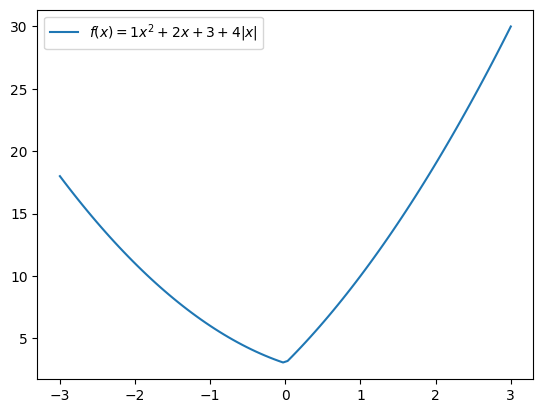

In [3]:
x = np.linspace(-3, 3, 100)
a, b, c, d = 1, 2, 3, 4
y = a * x ** 2 + b * x + c + d * np.abs(x)
plt.plot(x, y, label=f"$f(x)={a}x^2+{b}x+{c}+{d}|x|$")
plt.legend();

$a, b, c, d = 1, -3, 2, 1$とすると、$b<-d$になるので

$$
x = -\frac{b+d}{2a}=-\frac{-3+1}{2\cdot1} = 1
$$

が最適解となる。

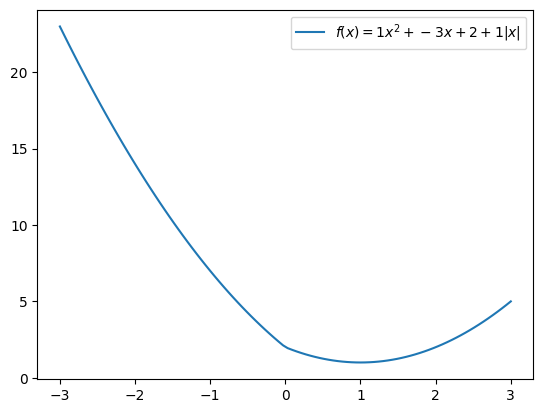

In [4]:
x = np.linspace(-3, 3, 100)
a, b, c, d = 1, -3, 2, 1
y = a * x ** 2 + b * x + c + d * np.abs(x)
plt.plot(x, y, label=f"$f(x)={a}x^2+{b}x+{c}+{d}|x|$")
plt.legend();

### ソフト閾値作用素

*Soft-thresholding operator*

以下の関数

$$
\begin{align}
S(x, \lambda)
    &= \text{sign}(x) \max(|x|-\lambda, 0) \\
    &= \begin{cases}
        x+\lambda & (x<-\lambda) \\
        0 & (-\lambda\leq x\leq \lambda) \\
        x-\lambda & (x>\lambda) \\
    \end{cases} \\
\end{align}
$$

- $\lambda \geq 0$


$\lambda=1$とすると、こんなグラフ。

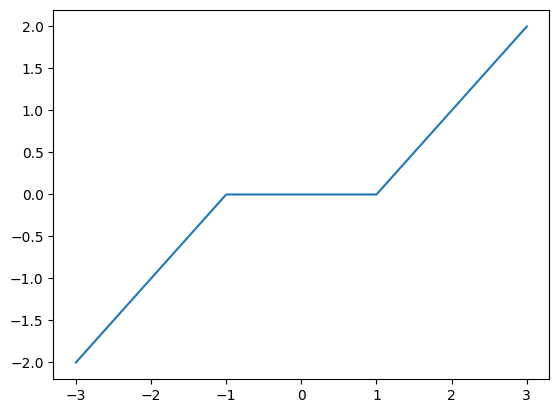

In [5]:
def soft_thresholding(x, threshold):
    return np.sign(x) * np.maximum(np.abs(x) - threshold, 0)

x = np.linspace(-3, 3, 100)
threshold = 1
y = soft_thresholding(x, threshold)
plt.plot(x, y);

$\lambda$を大きくすると0になる範囲が広がる。

この関数を用いると、先ほどの解を以下のように表せる。

$$
\begin{align}
\argmin_x f(x) &= \begin{cases}
    -\frac{b+d}{2a} & (b<-d) \\
    0 & (-d\leq b\leq d) \\
    -\frac{b-d}{2a} & (b>d) \\
\end{cases} \\
&= S\left(-\frac{b}{2a}, \frac{d}{2a}\right)
\end{align}
$$

先ほどの例では、$a, b, c, d = 1, 2, 3, 4$の時、$x=0$が解になった。確かめてみる。

In [6]:
a, b, c, d = 1, 2, 3, 4
soft_thresholding(-b / (2 * a), d / (2 * a))

-0.0

また、$a, b, c, d = 1, -3, 2, 1$の時、$x=1$が解になった。これも確かめてみる。

In [7]:
a, b, c, d = 1, -3, 2, 1
soft_thresholding(-b / (2 * a), d / (2 * a))

1.0


---

## 座標降下法

*Coordinate Descent*

パラメータを一つずつ順番に最適化する手法。



座標降下法ではパラメータを一つずつ最適化する。パラメータを

$$
\bm w = (w_1,w_2,\cdots,w_m)^T\in\mathbb R^m
$$

とすると、$w_1$, $w_2$, $\cdots$, $w_m$の順に最適化していく。$w_i$の最適化はそれ以外のパラメータ$w_{j\neq i}$を固定して行う。これを収束するまで繰り返す。

### Lassoの最適化

座標降下法を用いてLassoを最適化する。目的関数は以下。

$$
J(\bm w) = \frac{1}{2N}\| \bm y - \bm X \bm w \|_2^2 + \alpha \| \bm w \|_1
$$

一項目に$\frac{1}{2N}$を掛けた。$N$はデータ数。どうせ$\alpha$で比重を調整できるので定数を掛けても問題ない。

2で割るのは微分した時に出てくる2を消したいから。$N$で割るのはsklearnに倣っただけ。割らなくても良いんだけど、$\alpha=1$をデフォルトとした時に一番バランスが取れたので割った。

では$w_i$を最適化する。$w_{j\neq i}$を固定し、$J(w_i)$を最小化する$w_i$を求める。

劣微分の節でやったことと同じやり方でできる。$0\in\frac{\partial J}{\partial w_i}$となる$w_i$を求める。

まず$J(w_i)$を変形する。

$$
\begin{align}
J(w_i) 
    &= \frac{1}{2N}\| \bm y - \bm X \bm w \|_2^2 + \alpha \| \bm w \|_1 \\
    &= \frac{1}{2N}\sum_{n=1}^N \left( y^{(n)} - \bm w^T\bm x^{(n)} \right)^2 + \alpha \sum_{j=1}^m |w_j| \\
    &= \frac{1}{2N}\sum_{n=1}^N \left( y^{(n)} - \sum_{j=1}^m w_jx_j^{(n)} \right)^2 + \alpha \sum_{j=1}^m |w_j| \\
    &= \frac{1}{2N}\sum_{n=1}^N \left( y^{(n)} - \sum_{\substack{j=1\\ j\neq i}}^m w_jx_j^{(n)} - w_ix_i^{(n)} \right)^2 + \alpha \sum_{j=1}^m |w_j| \\
\end{align}
$$

最後は$w_i$に関連する部分だけ$\sum$の外に出した感じ。

ここで以下を定義する。

$$
\begin{align}
r_{-i}^{(n)} &= y^{(n)} - \sum_{\substack{j=1\\ j\neq i}}^m w_jx_j^{(n)} \\
\bm r_{-i} &= (r_{-i}^{(1)}, r_{-i}^{(2)}, \cdots, r_{-i}^{(N)})^T \in \mathbb R^N \\
\bm x_i &= (x_i^{(1)}, x_i^{(2)}, \cdots, x_i^{(N)})^T \in \mathbb R^N \\
\end{align}
$$

$r_{-i}^{(n)}$は$i$番目の特徴量$x_i^{(n)}$を考慮せずに予測した値の誤差。$\bm r_{-i}$はそれらを並べたベクトル。$\bm x_i$は$i$番目の特徴量を並べたベクトル。

これで進める。

$$
\begin{align}
J(w_i) 
    &= \frac{1}{2N}\sum_{n=1}^N \left( \bm r_{-i}^{(n)} - w_ix_i^{(n)} \right)^2 + \alpha \sum_{j=1}^m |w_j| \\
    &= \frac{1}{2N}\sum_{n=1}^N \left( (\bm r_{-i}^{(n)})^2 - 2\bm r_{-i}^{(n)}w_ix_i^{(n)} + (w_ix_i^{(n)})^2 \right) + \alpha \sum_{j=1}^m |w_j| \\
    &= \frac{1}{2N} \left( \sum_{n=1}^N(\bm r_{-i}^{(n)})^2 - 2w_i\sum_{n=1}^N\bm r_{-i}^{(n)}x_i^{(n)} + w_i^2\sum_{n=1}^N(x_i^{(n)})^2 \right) + \alpha \sum_{j=1}^m |w_j| \\
    &= \frac{1}{2N} \left( \sum_{n=1}^N(\bm r_{-i}^{(n)})^2 - 2w_i\bm r_{-i}^T\bm x_i + w_i^2\|\bm x_i\|_2^2 \right) + \alpha \sum_{j=1}^m |w_j| \\
    &= -\frac{1}{N}w_i\bm r_{-i}^T\bm x_i + \frac{1}{2N}w_i^2\|\bm x_i\|_2^2 + \alpha|w_i| + \text{const} \\
\end{align}
$$

$w_i$に関係のない項は定数として$\text{const}$にまとめた。

さてこれを並び替えてみると

$$
J(w_i) = \frac{1}{2N}\|\bm x_i\|_2^2w_i^2 - \frac{1}{N}\bm r_{-i}^T\bm x_iw_i + \text{const} + \alpha|w_i|
$$

前節で解いた$f(x)=ax^2+bx+c+d|x|$と同じ形になった。この解は$S\left(-\frac{b}{2a}, \frac{d}{2a}\right)$であるため、

$$
\begin{align}
a &= \frac{1}{2N}\|\bm x_i\|_2^2 \\
b &= -\frac{1}{N}\bm r_{-i}^T\bm x_i \\
d &= \alpha \\
\end{align}
$$

を代入すると

$$
\argmin_{w_i} J(w_i) = S\left(\frac{\bm r_{-i}^T\bm x_i}{\|\bm x_i\|_2^2}, \frac{N\alpha}{\|\bm x_i\|_2^2}\right)
$$

が得られる。これで解が求まった。

また、バイアス項に対応するパラメータは正則化をしないので、解が変わる。

$w_0$をバイアスとし、正則化項を無視すると、

$$
J(w_0) = \frac{1}{2N}\|\bm x_0\|_2^2w_0^2 - \frac{1}{N}\bm r_{-i}^T\bm x_iw_i + \text{const}
$$

となる。これを微分し、

$$
\frac{\partial J}{\partial w_0} = \frac{1}{N}\|\bm x_0\|_2^2w_0 - \frac{1}{N}\bm r_{-0}^T\bm x_0
$$

$=0$とおいて$w_0$について解くと

$$
w_0 = \frac{\bm r_{-0}^T\bm x_0}{\|\bm x_0\|_2^2}
$$

となる。ここで$\bm x_0=(1, 1, \cdots, 1)^T\in\mathbb R^N$より

$$
\begin{align}
w_0
    &= \frac{\sum_{n=1}^Nr_{-0}^{(n)}}{N} \\
    &= \mathbb E[r_{-0}^{(n)}] \\
\end{align}
$$

となる。バイアスを無視した予測値と正解の差の平均だね。

以上が座標降下法を用いたLassoの最適化である。最後に手順をまとめる。

1. $\bm w$を初期化
2. $w_0$を最適化: $w_0 \leftarrow \mathbb E[r_{-0}^{(n)}]$
3. $w_1, w_2, \cdots, w_m$を最適化: $w_i \leftarrow S\left(\frac{\bm r_{-i}^T\bm x_i}{\|\bm x_i\|_2^2}, \frac{N\alpha}{\|\bm x_i\|_2^2}\right)$
4. 収束するまで2, 3を繰り返す


---

## 実装

実装してみよう。

In [8]:
class LassoRegression:
    def __init__(self, alpha: float = 1., max_iter: int = 1000):
        self.alpha = alpha
        self.max_iter = max_iter # 繰り返しの上限
        self.weights = None

    def fit(self, X, y):
        X = np.insert(X, 0, 1, axis=1)
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features) # パラメータの初期化
        for _ in range(self.max_iter): # 上限まで繰り返し
            self.weights[0] = np.mean(y - X[:, 1:] @ self.weights[1:])
                # w_0の更新
            for i in range(1, n_features):
                r = y - np.delete(X, i, 1) @ np.delete(self.weights, i)
                x_i = X[:, i]
                norm = np.linalg.norm(x_i) ** 2
                self.weights[i] = soft_thresholding( # w_iの更新
                    r @ x_i / norm, n_samples * self.alpha / norm
                )

    def predict(self, X):
        X = np.insert(X, 0, 1, axis=1)
        return X @ self.weights

ほい。

収束するまでと書いたが、コードをシンプルにするため、繰り返しの上限`max_iter`を指定し、上限に達したら終了するようにした。

In [9]:
# サンプルデータの読み込み
from sklearn.datasets import load_diabetes
X, y = load_diabetes(return_X_y=True)

In [10]:
model = LassoRegression(alpha=1.)
model.fit(X, y)
model.weights[0], model.weights[1:]

(152.133484162896,
 array([  0.        ,  -0.        , 367.70162582,   6.30970264,
          0.        ,   0.        ,  -0.        ,   0.        ,
        307.60214746,   0.        ]))

sklearnとも一致する。

In [11]:
from sklearn.linear_model import Lasso
model = Lasso(alpha=1.)
model.fit(X, y)
model.intercept_, model.coef_

(152.133484162896,
 array([  0.        ,  -0.        , 367.70385976,   6.29885756,
          0.        ,   0.        ,  -0.        ,   0.        ,
        307.6054181 ,   0.        ]))


---

## スパースな解